# Moses Permaul - IS362 - Week 13 Assignment

Mushrooms Dataset. A famous—if slightly moldy—dataset about mushrooms can be found in the UCI repository here: https://archive.ics.uci.edu/ml/datasets/Mushroom. The fact that this is such a well-known dataset in the data science community has made it a good dataset to use for comparative benchmarking. For example, if someone was working to build a better decision tree algorithm (or other predictive classifier) to analyze categorical data, this dataset could be useful. In Project 4, we’ll use scikit-learn to answer the question, “Which other attribute or attributes are the best predictors of whether a particular mushroom is poisonous or edible?”

**Your assignment is to:**
1. First study the dataset and the associated description of the data (i.e. “data dictionary”). You may need to look around a bit, but it’s there!
2. Create a pandas DataFrame with a subset of the columns in the dataset. You should include the column that indicates edible or poisonous, the column that includes odor, and at least one other column of your choosing.
3. Add meaningful names for each column.
4. Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
5. Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
6. Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

### 1. Studying the Dataset
The dataset descriptipon can be found here: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

When reviewing the description, we can see that there are a total of 2 classes (edible=e and poisonous=p) and 22 attributes. Along with these, there are some generalized rules provided that can help accuratley determine if a mushroom is poisonous.

The columns **"edible"**, **"odor"**, and **"habitat"** will be used. 

### 2/3 Creating a Pandas DataFrame Using the Dataset with Meaningful Names

In [1]:
# standard imports for matplotlib, numpy, pandas, and seaborn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# enable inline plotting
%matplotlib inline

# url containing mushroom dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'

# read data to DataFrame using meaningful column names
df = pd.read_csv(url, usecols=[0,5,22], header=None, names=['Edible', 'Odor','Habitat'])

# view first 5 rows
df.head()

,Edible,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


### 4. Updating DataFrame to Use Numeric Values
For the attributes that we will be using, the dataset desciption shows that the following are the possible values:

    edible:  edible=e, poisonous=p
    odor:    almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

We will convert these values to numeric ones using **replace()**

In [2]:
# copy dataframe to preserve original
df_mushroom = df.copy()

# update dataframe to use numeric values
df_mushroom.replace(to_replace={'Edible':{'e': 0, 'p': 1}}, inplace = True)
df_mushroom.replace(to_replace={'Odor':{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace = True)
df_mushroom.replace(to_replace={'Habitat':{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}}, inplace = True)

# view first 5 rows
df_mushroom.head()

,Edible,Odor,Habitat
0,1,7,4
1,0,0,0
2,0,1,2
3,1,7,4
4,0,6,0


### 5. Exploratory Data Analysis
The first thing we will look at is the distribution of data for each column.

In [3]:
# count edible values
df_mushroom.Edible.value_counts()

0    4208
1    3916
Name: Edible, dtype: int64

Looking at the **"Edible"** column, we can see that 4208 are listed as being edible and 3916 is listed as being poisonous.

In [4]:
# count odor values
df_mushroom.Odor.value_counts()

6    3528
4    2160
3     576
8     576
1     400
0     400
7     256
2     192
5      36
Name: Odor, dtype: int64

Looking at the **"Odor"** column, we can see that the odor corresponding to 6 ("none") has the highest number. The next highest odor is 4 ("foul"). The lowest is 5 ("musty").

**Reminder of Mapping:**
0. almond=a
1. anise=l
2. creosote=c
3. fishy=y
4. foul=f
5. musty=m
6. none=n
7. pungent=p
8. spicy=s


In [5]:
# count habitat values
df_mushroom.Habitat.value_counts()

6    3148
0    2148
3    1144
1     832
4     368
2     292
5     192
Name: Habitat, dtype: int64

Looking at the **"Habitat"** column, we can see that the one corresponding to 6 ("woods") has the highest number. The next highest is 0 ("grasses"). The lowest is 5 ("waste").

**Reminder of Mapping:**
0. grasses=g
1. leaves=l
2. meadows=m
3. paths=p
4. urban=u
5. waste=w
6. woods=d


### Scatterplots
The below scatterplot shows the relationship between class edible and attribute odor.

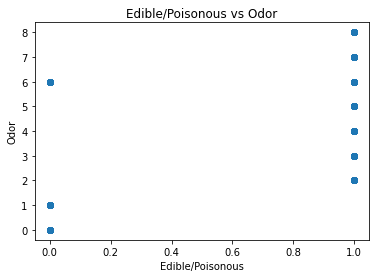

In [6]:
# plot scatter using dataframe
plt.scatter(df_mushroom.Edible, df_mushroom.Odor)

# set chart labels and title
plt.xlabel('Edible/Poisonous')
plt.ylabel('Odor')
plt.title('Edible/Poisonous vs Odor')

# display plot
plt.show()

The below scatterplot shows the relationship between class edible and attribute habitat.

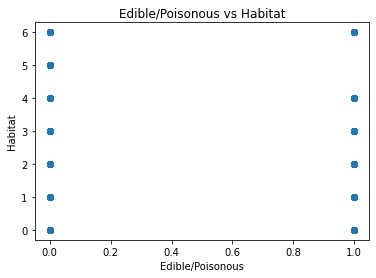

In [7]:
# plot scatter using dataframe
plt.scatter(df_mushroom.Edible, df_mushroom.Habitat)

# set chart labels and title
plt.xlabel('Edible/Poisonous')
plt.ylabel('Habitat')
plt.title('Edible/Poisonous vs Habitat')

# display plot
plt.show()

### 6. Conclusion

Looking at our scatterplots generated from the data, we can conclude that **"Odor" is a good indicator** on whether a mushroom is edible or not. According to our data, **a mushroom that has a almond or anise odor should be safe to eat**. Even though we have "none" listed with some edible mushrooms, there is some overlap where some poisonous ones don't have an odor. Due to this, **mushrooms with no odor is not a good enough indicator**.

When it comes to habitats, there is a lot of overlap, so it isn't a good choice when looking at the relationship between habitat and edible/poisonous. We can see that if the mushrooms's habitat is "waste", then it's likely to be edible. However all other habitats share both edible and poisonous mushrooms.